<a href="https://colab.research.google.com/github/swapnil2009/DataScience/blob/main/Loan_Default_Prediction_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

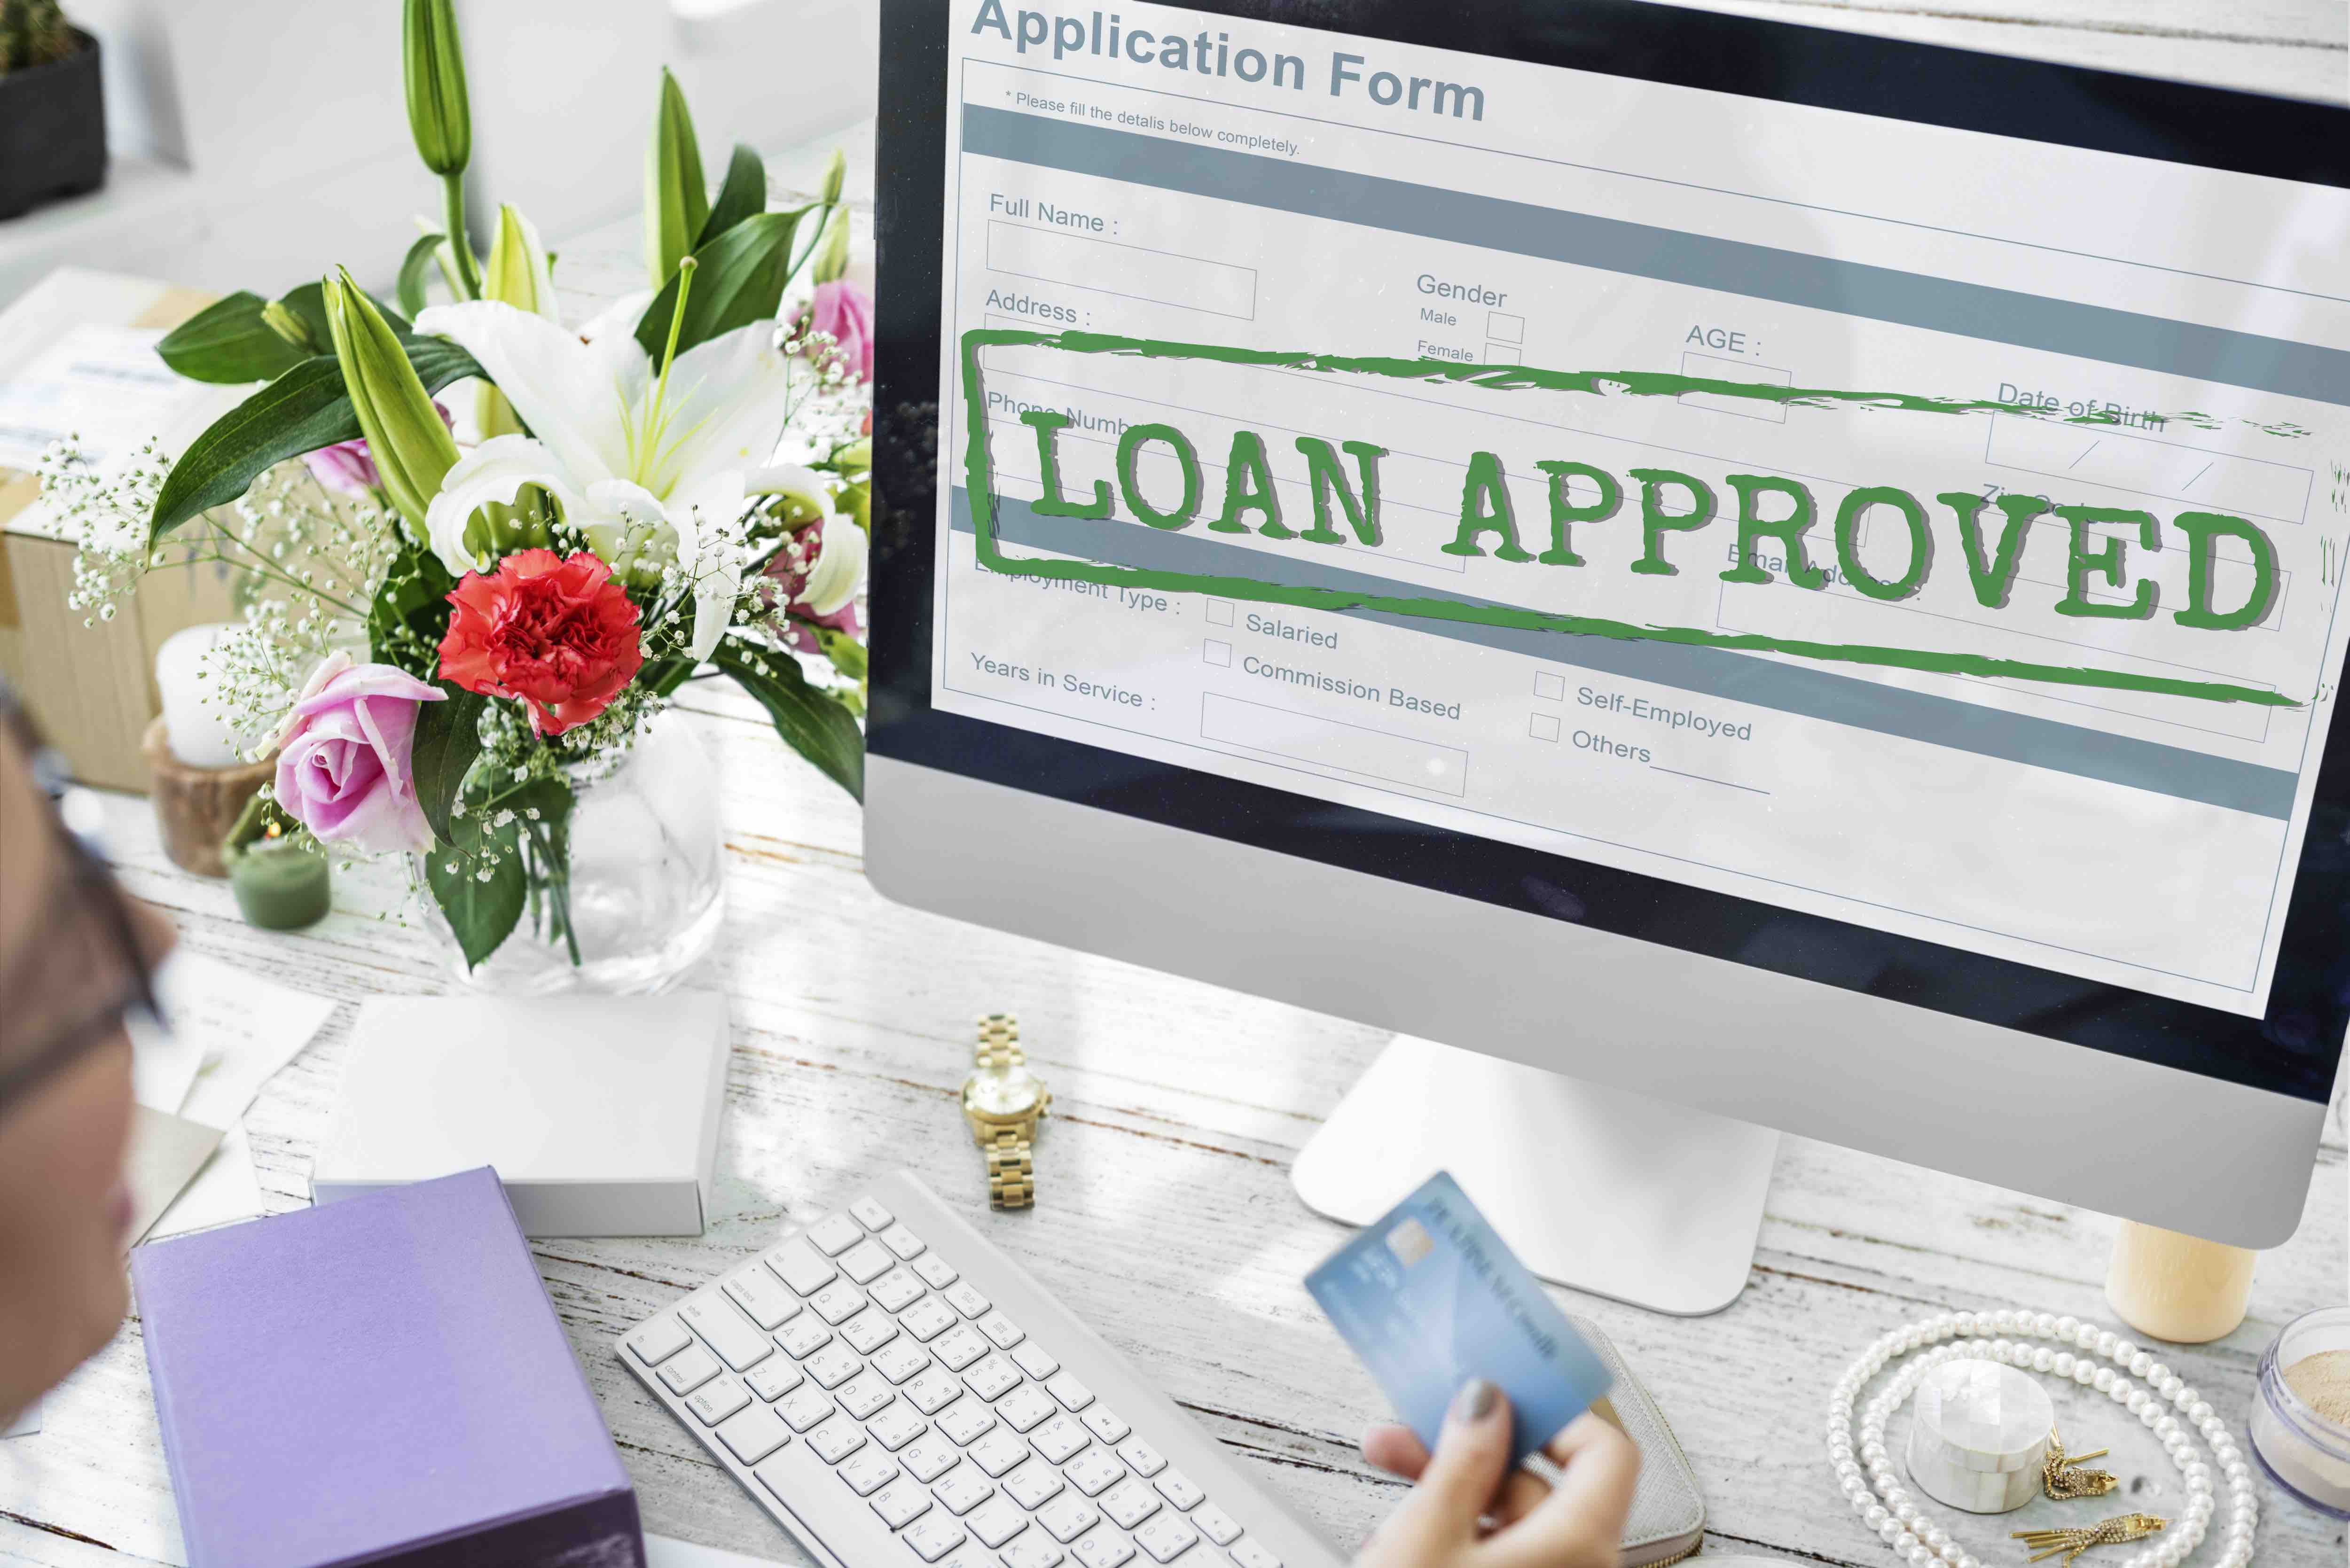

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 - So the bank can identify candidates who are likely to not default.

### **The objective:**

 - What is the intended goal?
 - Make a Machine learning model to predict which borrowers might  default on loan.

### **The key questions:**

- What are the key questions that need to be answered?
- Which factors affect the ability of a borrower to be able to pay back the loan.

### **The problem formulation**:

- What is it that we are trying to solve using data science?
- We are trying to build ML models to identify factors affecting borrowers ability to pay back loan and identify who will be a good candidate to issue the loan to. We want to build a classification model to classify loans as BAD or GOOD based on various parameters.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [ ]:
hm=pd.read_csv("hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
# Display first five rows


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Display last 5 rows

hm.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data


hm.shape

(5960, 13)

**Insights ________**
- 5960 data points and 13 features.

### **Check the data types of the columns**

In [ ]:
# Check info of the data

hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**
- 2 features are integers, 2 are objects, and remaining are float numbers. So 11 numerical features and 2 categorical

### **Check for missing values**

In [ ]:
# Analyse missing values - Hint: use isnull() function

hm.isnull().sum()

,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


In [ ]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset


hm.isnull().sum()/56.90

,0
BAD,0.000000
LOAN,0.000000
MORTDUE,9.103691
VALUE,1.968366
REASON,4.428822
JOB,4.903339
YOJ,9.050967
DEROG,12.442882
DELINQ,10.193322
CLAGE,5.413005




```
# This is formatted as code
```

**Insights ________**
Debt to income ratio is missing 22% values
whereas Derogatory reports and delinquent reports are missing 12% and 10% data respectively

### **Things to Ponder:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them?

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. hint use astype() function


for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables


data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights ______________**

In [ ]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']


data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights _____________**
- just two categories in target variable, 1 is defaulted and 0 is not defaulted, not defaulted is more.
- only two values for reason for the loan, one is debt consolidation and the other home improvement. Debt consolidation is the major reason of 2/3rds
- Six different entries for Jobs, one of which is other, which seems as good as not given


**Let's look at the unique values in all the categorical variables**

In [ ]:
data.value_counts("JOB")

,count
JOB,
Other,2388
ProfExe,1276
Office,948
Mgr,767
Self,193
Sales,109


In [ ]:
# Checking the count of unique values in each categorical column


cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data.value_counts(i))
    print('*'*40)

Unique values in BAD are :
BAD
0    4771
1    1189
Name: count, dtype: int64
****************************************
Unique values in REASON are :
REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64
****************************************
Unique values in JOB are :
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64
****************************************


**Insights _____________**

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

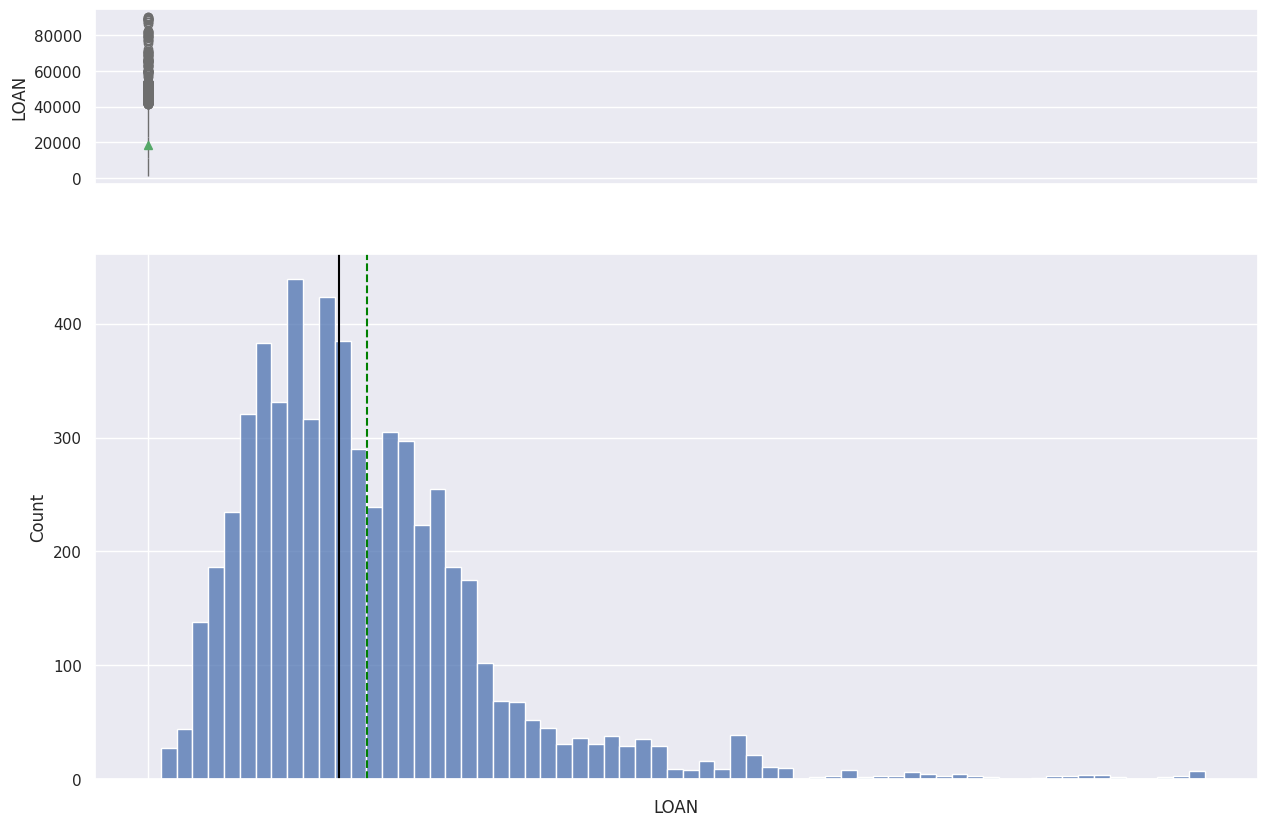

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

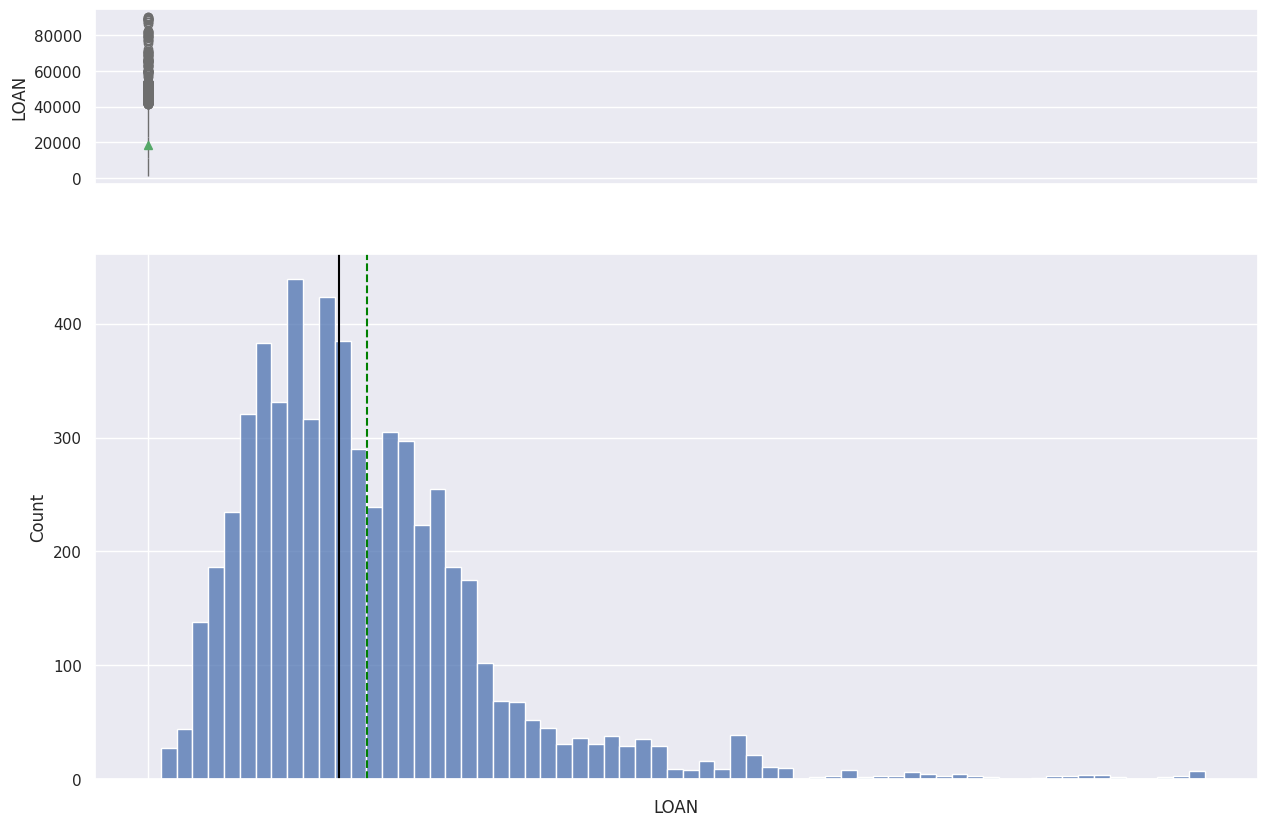

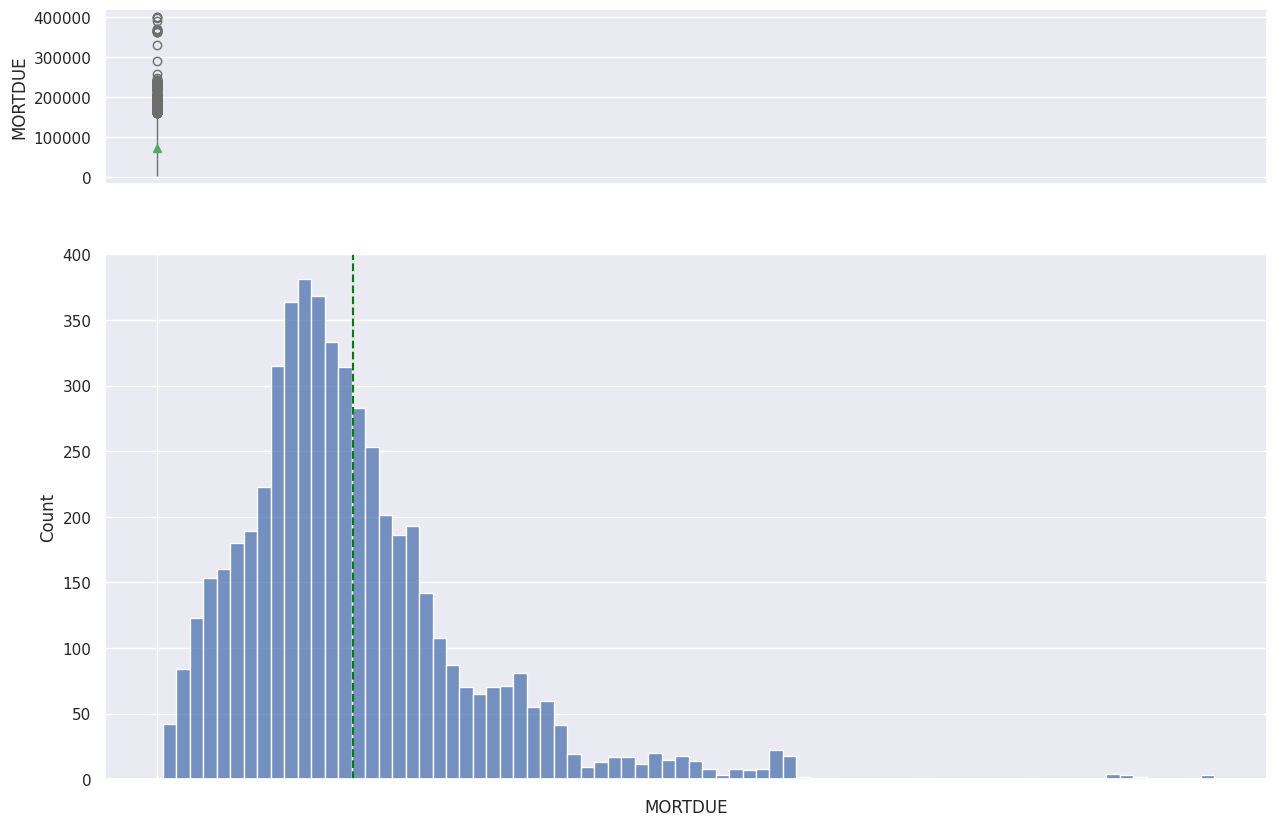

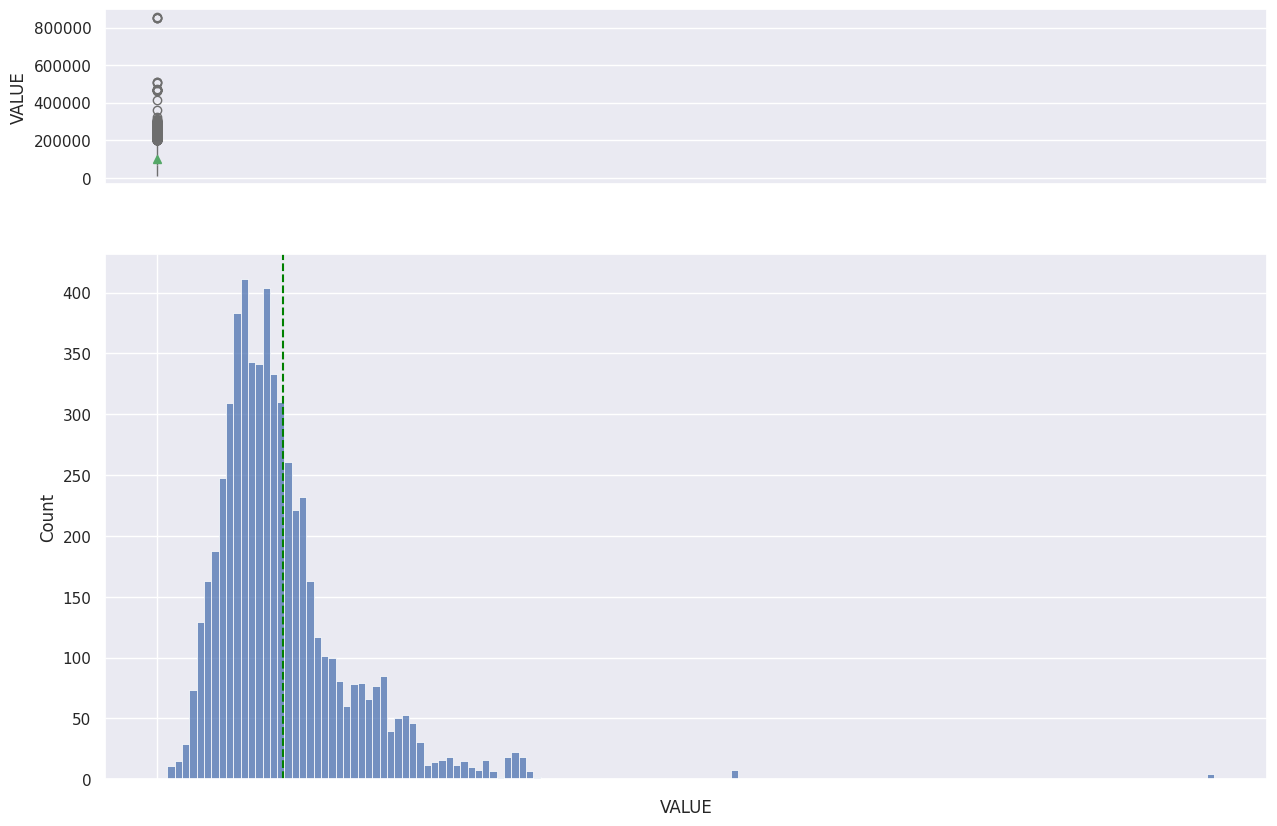

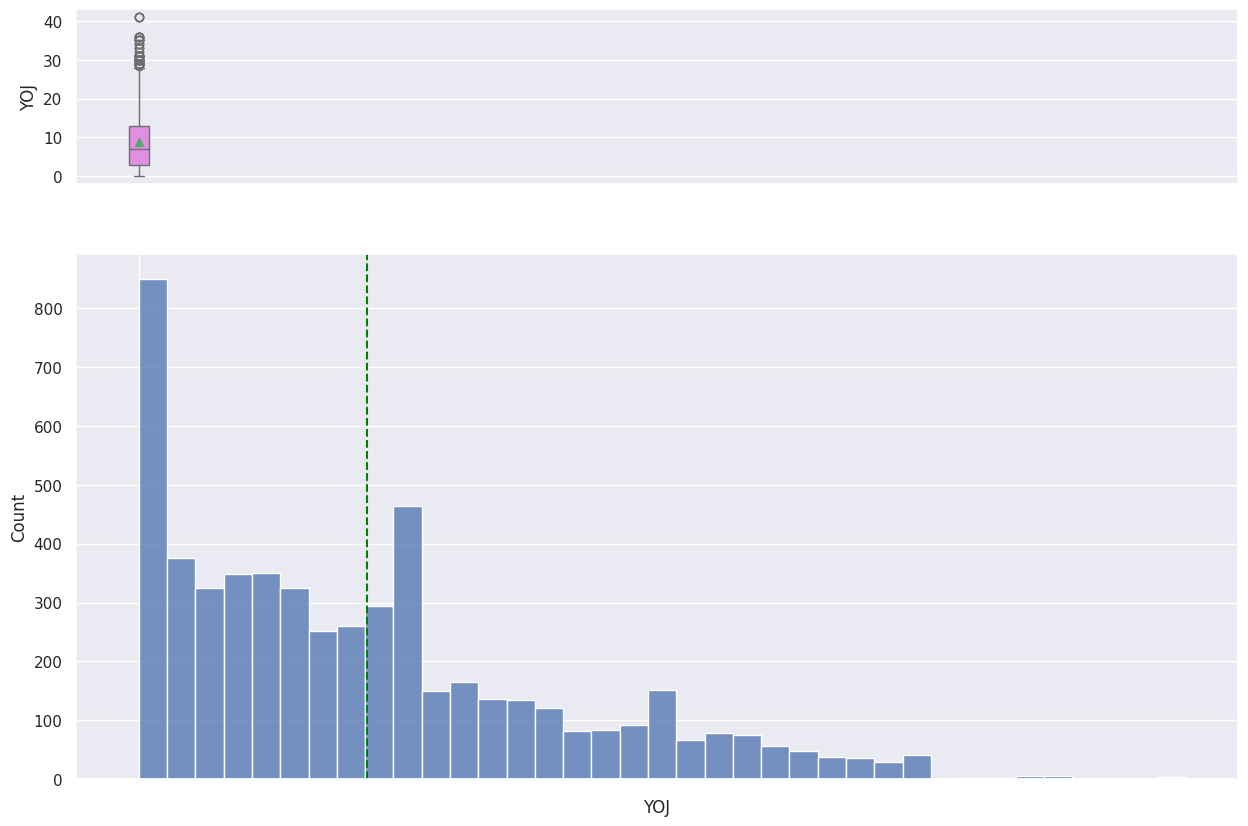

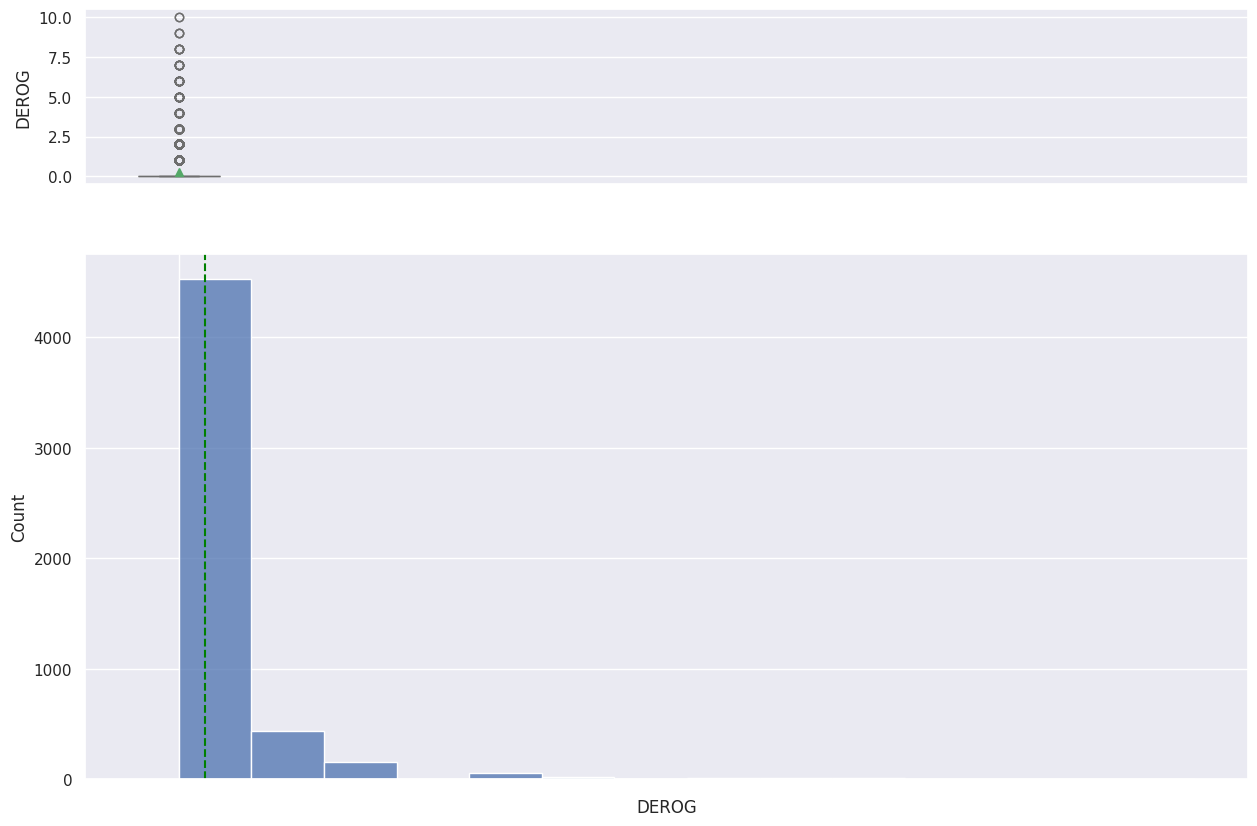

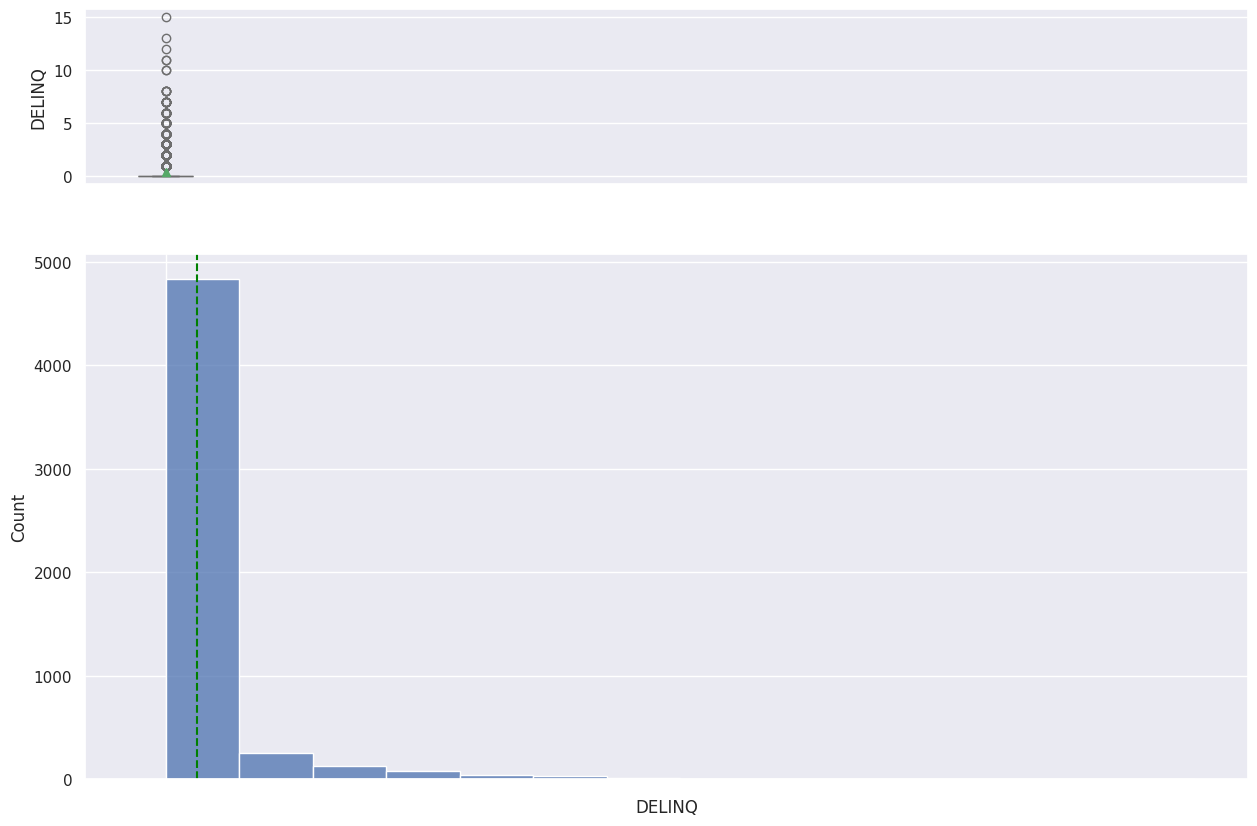

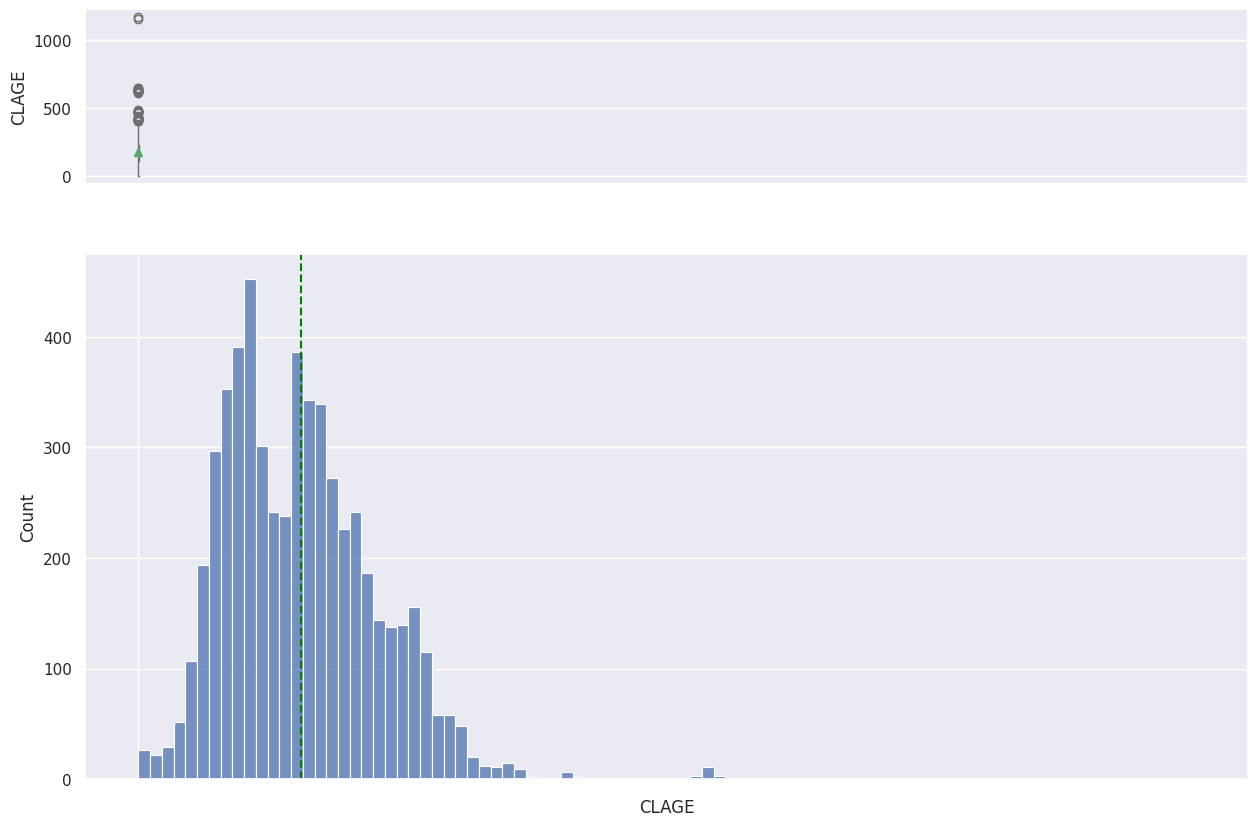

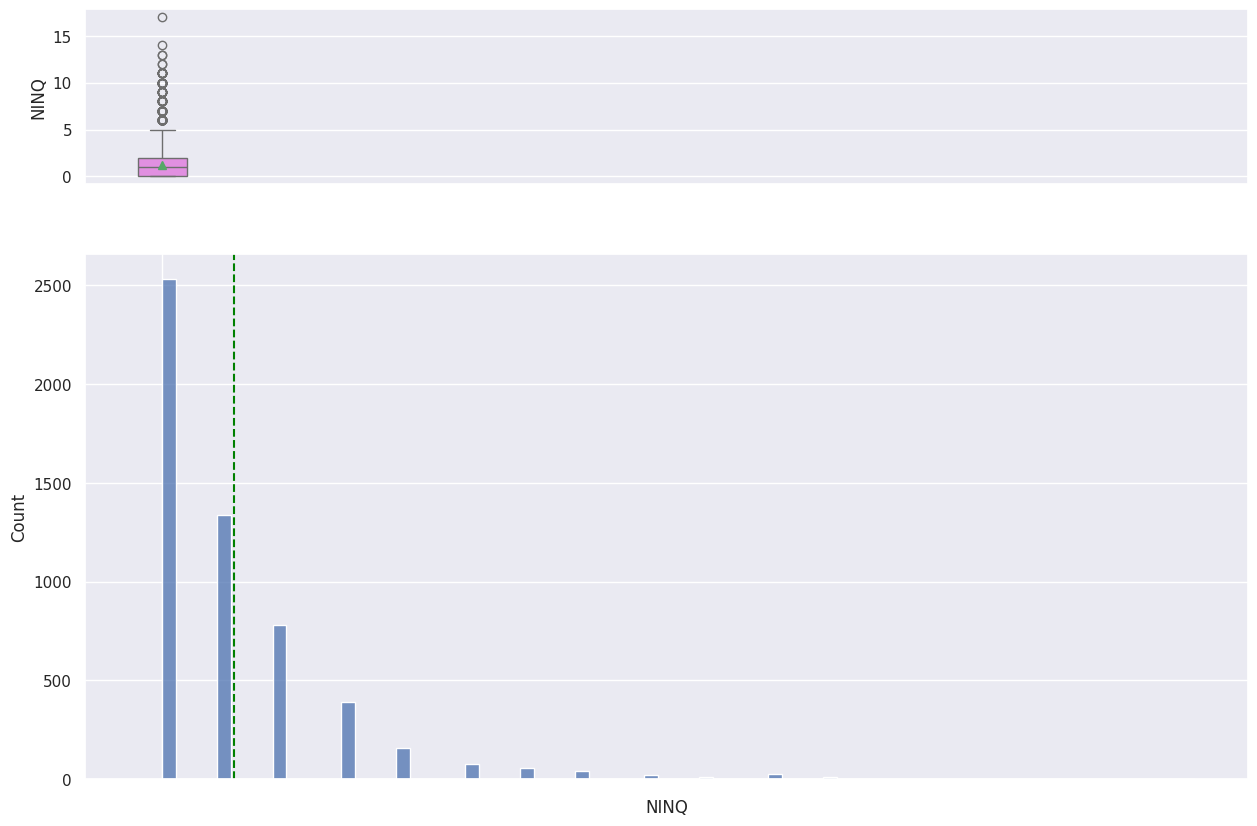

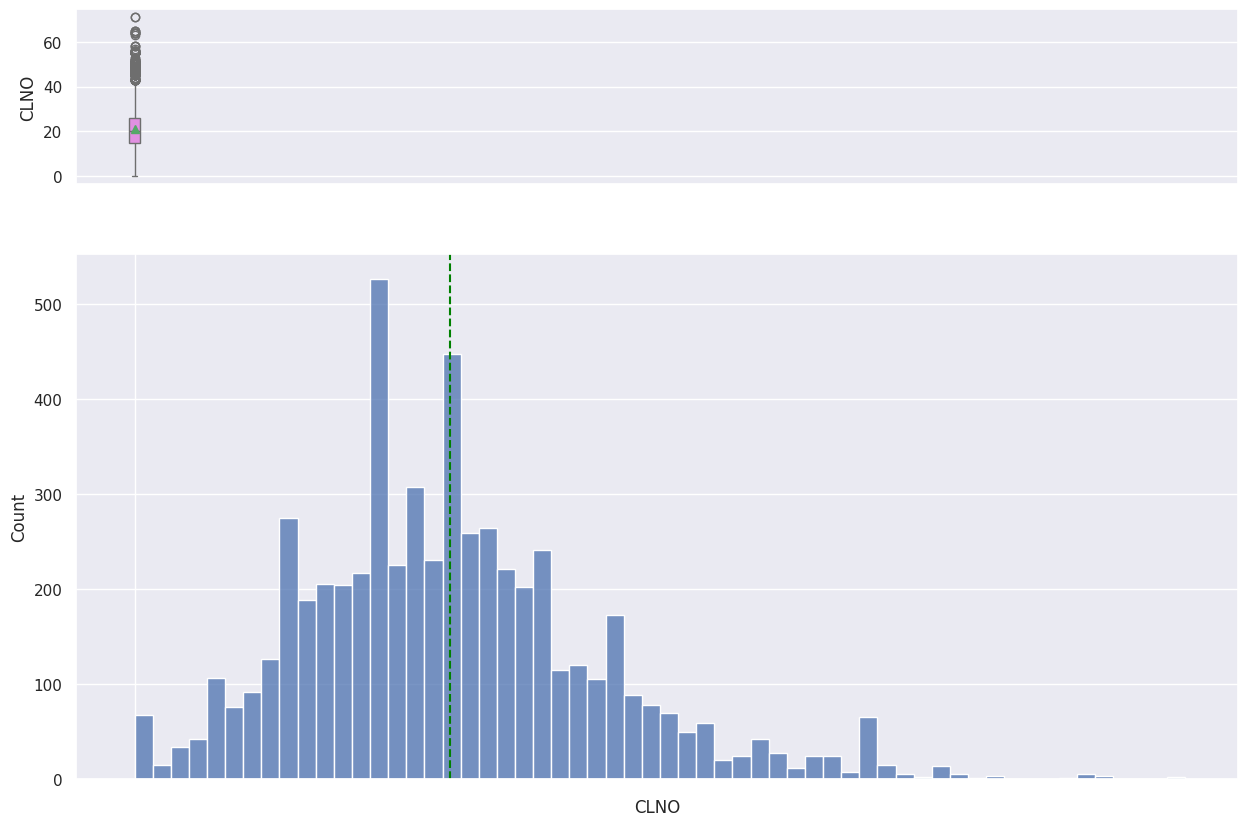

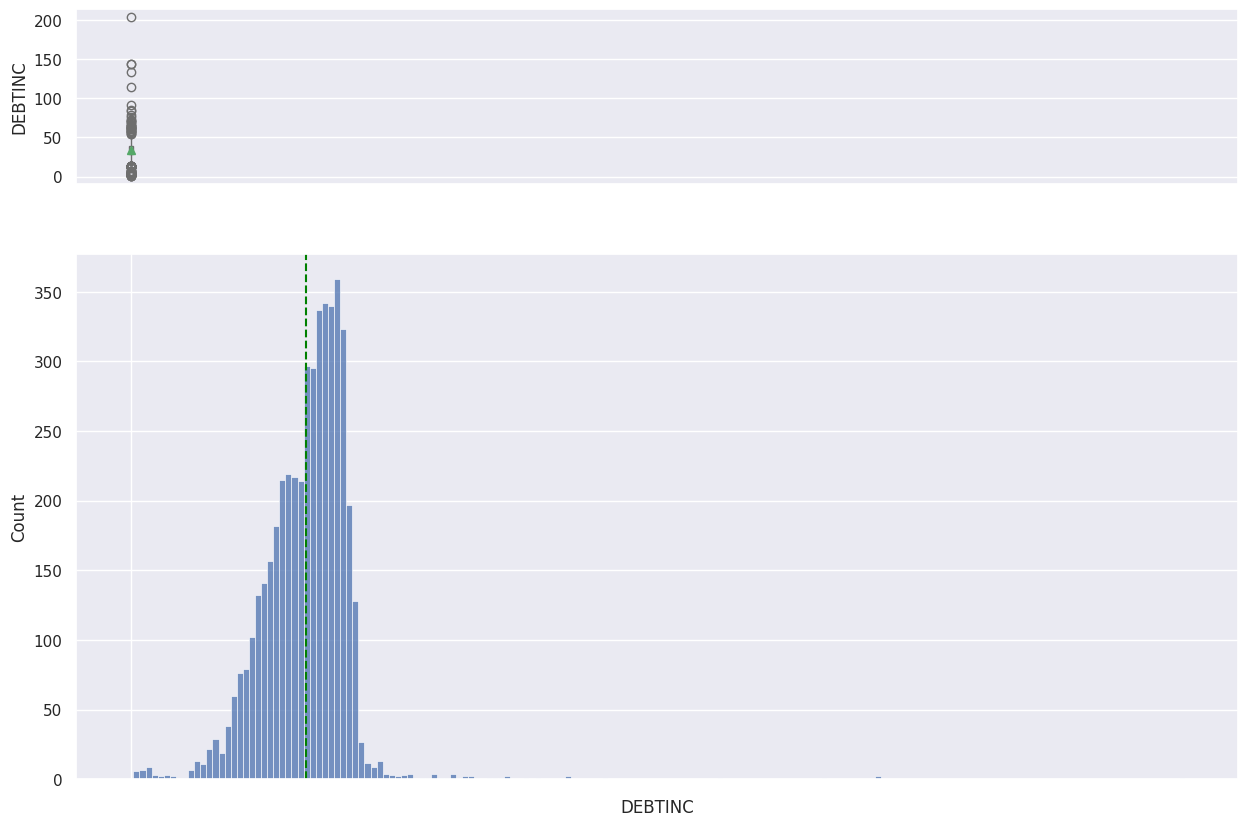

In [ ]:
for i in data.columns:
  if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
    histogram_boxplot(data[i])

**Insights ____________**

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

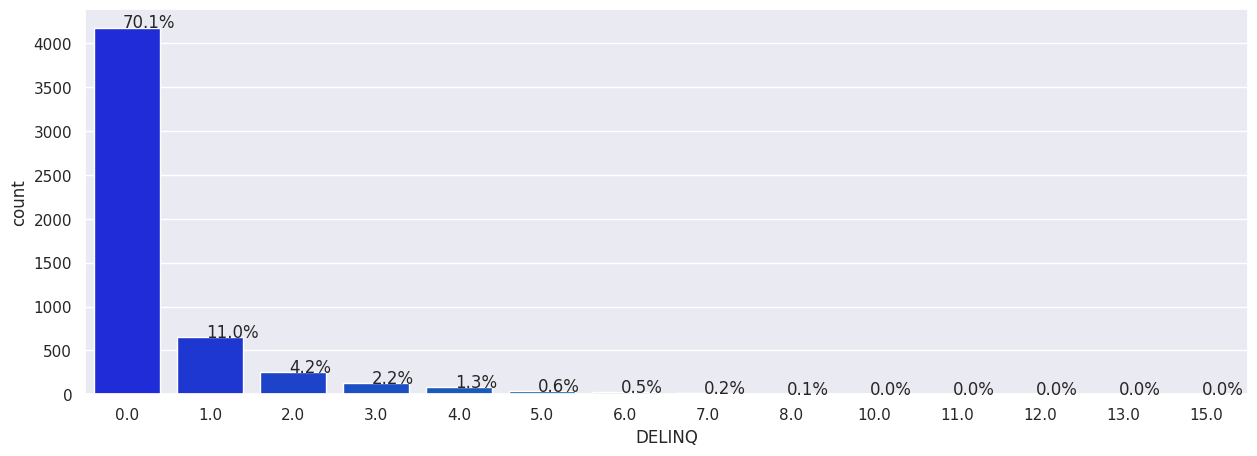

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights ________**

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

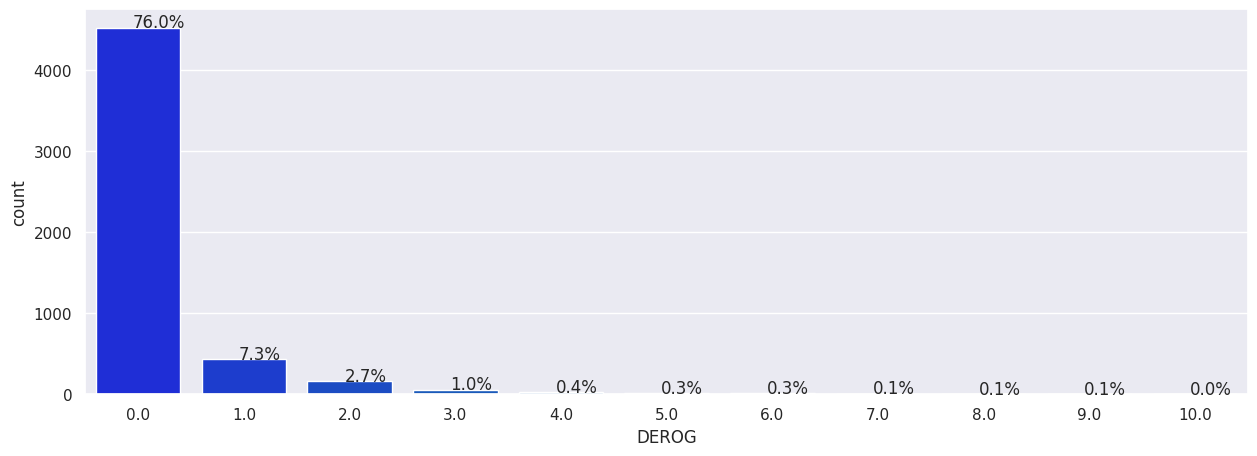

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

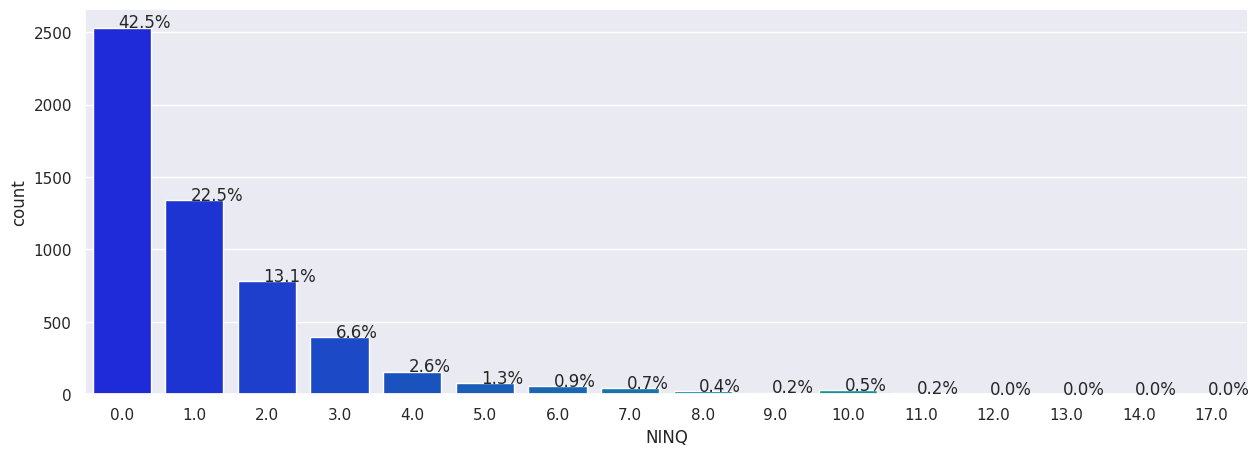

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

**Insights _____________**

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

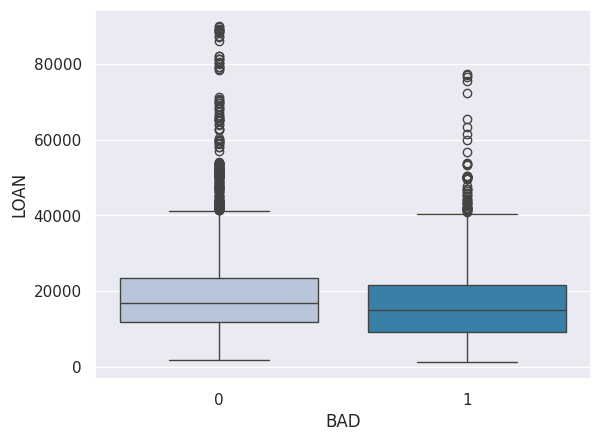

In [ ]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='YOJ'>

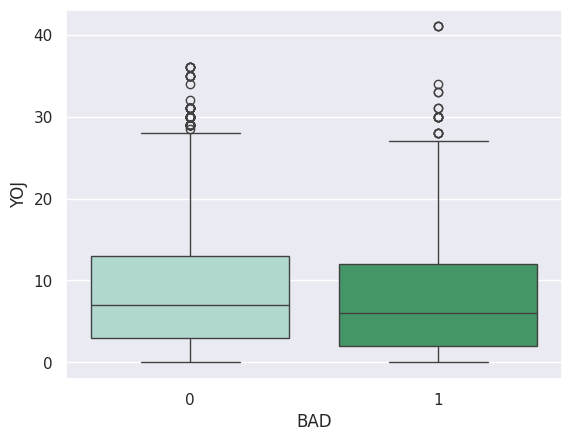

In [ ]:
sns.boxplot(x=data["BAD"],y=data['YOJ'],palette="BuGn")

<Axes: xlabel='JOB', ylabel='LOAN'>

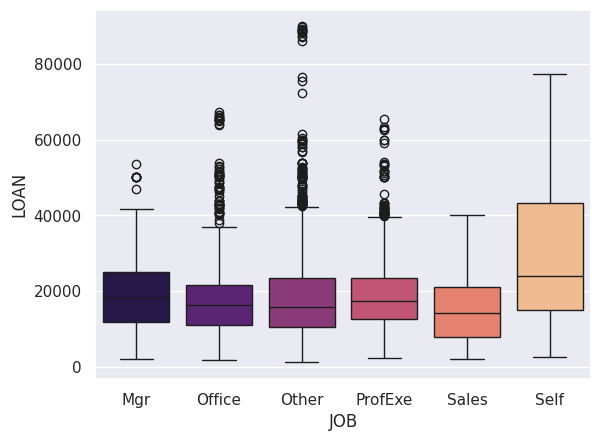

In [ ]:
sns.boxplot(x=data["JOB"],y=data['LOAN'],palette="magma")

**Insights ______**

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

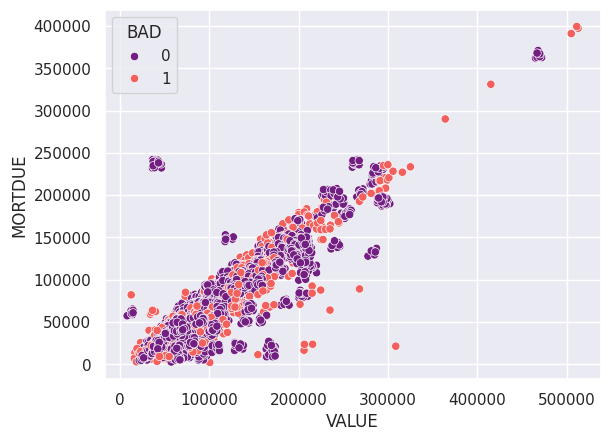

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="magma",hue=data['BAD'])

It is interesting to see that there were a few with high value and low mortdue, but failed to payback the loan (the orange points on the bottom towards middle and right)

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

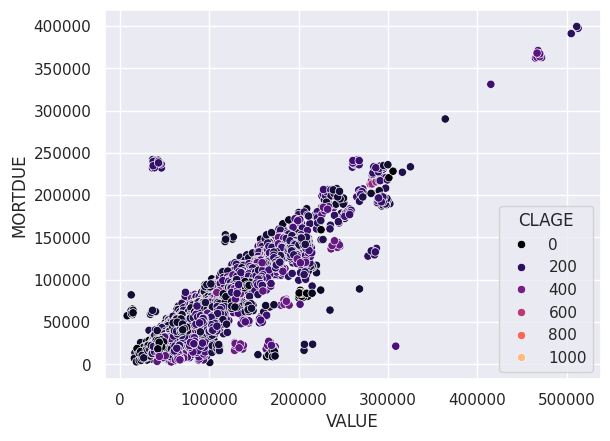

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="magma",hue=data['CLAGE'])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

**Insights ____________**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


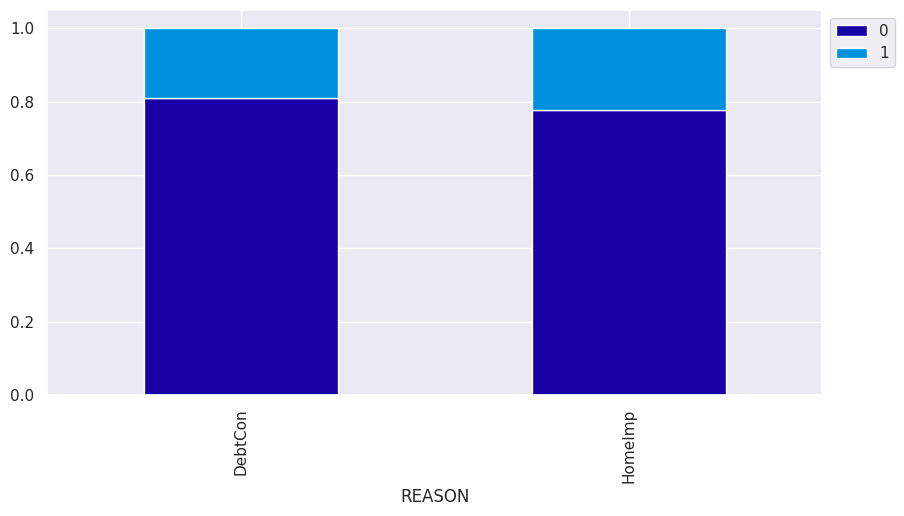

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights ___________________**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

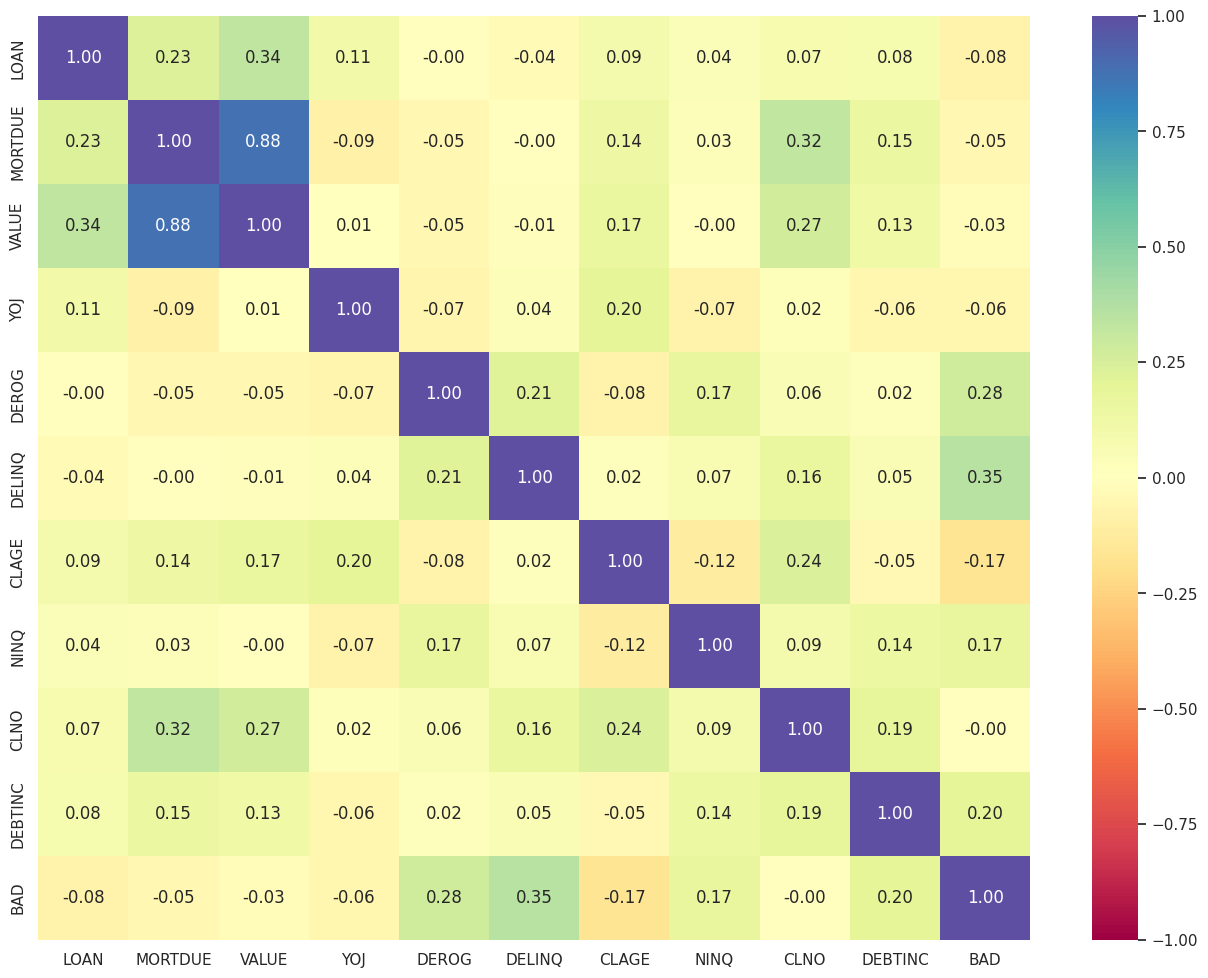

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col.append('BAD')
# Build correlation matrix for numerical columns


corr = data[numerical_col].corr()

# plot the heatmap


plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='Spectral',vmax=1,vmin=-1,
        fmt=".2f",annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
# Build pairplot for the data with hue = 'BAD'


#sns.pairplot(data,hue='BAD')

### **Things to Ponder:**
- Are there missing values and outliers in the dataset? If yes, how can we treat them?
- Can we think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''


    Q1=df[col].quantile(0.25)# 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1  # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5442 non-null   float64 
 3   VALUE                        5848 non-null   float64 
 4   REASON                       5708 non-null   category
 5   JOB                          5681 non-null   category
 6   YOJ                          5445 non-null   float64 
 7   DEROG                        5252 non-null   float64 
 8   DELINQ                       5380 non-null   float64 
 9   CLAGE                        5652 non-null   float64 
 10  NINQ                         5450 non-null   float64 
 11  CLNO                         5738 non-null   float64 
 12  DEBTINC                      4693 non-null   float64 
 13  MOR

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.median()

# Fill object columns with model.

for column in cat_data:
    if column == 'BAD':
        continue
    mode = df[column].mode()[0]
    df[column] = df[column].mode()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   float64 
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       1 non-null      category
 5   JOB                          1 non-null      category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   float64 
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       1 non-null      category
 5   JOB                          1 non-null      category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [ ]:
#@title

# Create y(dependent varibale)
y = df['BAD']
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop('BAD', axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first=True)






### **Splitting the data into 70% train and 30% test set**

In [ ]:
#@title
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)





### **Variations**
- We can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can we make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### Based on the problem statement, which evaluation metrics are important to consider and why?

In [ ]:
#@title
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model**

In [ ]:
# Remove rows with NaN in y_train
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

In [ ]:
#@title
# Defining the Logistic regression model
log_reg = LogisticRegression()


# Fitting the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3340
           1       0.65      0.66      0.66       832

    accuracy                           0.86      4172
   macro avg       0.78      0.79      0.78      4172
weighted avg       0.86      0.86      0.86      4172



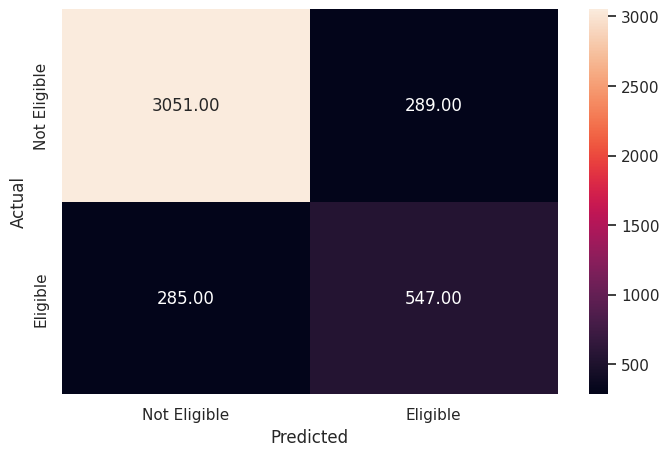

In [ ]:
#@title
#Predict for train set
y_pred = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1431
           1       0.66      0.64      0.65       357

    accuracy                           0.86      1788
   macro avg       0.79      0.78      0.78      1788
weighted avg       0.86      0.86      0.86      1788



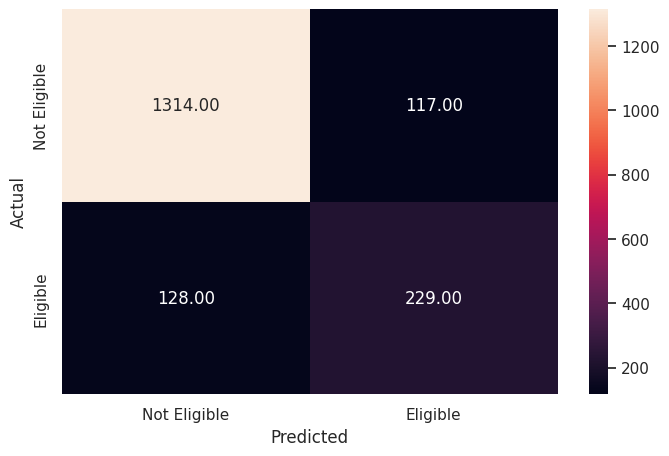

In [ ]:
#@title
#Predict for test set
y_pred = log_reg.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred)

**Observations: __________**

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [ ]:
#@title
# Printing the coefficients of logistic regression
print(log_reg.coef_)


[[-3.05674846e-06 -1.20418274e-05 -1.66103145e-05 -1.32713860e-09
   0.00000000e+00  0.00000000e+00 -3.33737480e-08 -1.89238790e-10
  -3.77830157e-09 -6.50071824e-09  1.28867773e-01  3.46393376e+00
  -9.13218116e-02 -1.63521030e+00 -3.93572181e-01 -1.08060854e+00
  -8.50015074e-01  1.38567415e+00  2.73107603e-01  9.38215499e-01
   2.78824540e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]


**Insights ________**